In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 2
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.7
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[2_10_51_300_0.7_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[2_10_51_300_0.7_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	270.4227

Best Fitness:	216.9707
Solution:	200.0000
Diff:		16.9707

[0:09:10][----------] 1.96% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	251.9732

Best Fitness:	213.7198
Solution:	200.0000
Diff:		13.7198

[0:17:22][----------] 3.92% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	300.0277

Best Fitness:	228.8004
Solution:	200.0000
Diff:		28.8004

[0:25:23][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	271.5588

Best Fitness:	213.3694
Solution:	200.0000
Diff:		13.3694

[0:33:21][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	264.3610

Best Fitness:	212.1022
Solution:	200.0000
Diff:		12.1022

[0:40:38][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	242.7939

Best Fitness:	211.1950
Solution:	200.0000
Diff:		11.1950

[0:47:46][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	305.1204

Best Fitness:	235.6324
Solution:	200.0000
Diff:		35.6324

[0:55:06][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	234.5936

Best Fitness:	209.3771
Solution:	200.0000
Diff:		9.3771

[1:02:51][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	282.0303

Best Fitness:	208.0781
Solution:	200.0000
Diff:		8.0781

[1:10:20][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	291.2644

Best Fitness:	215.2777
Solution:	200.0000
Diff:		15.2777

[1:17:41][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	243.6304

Best Fitness:	208.5847
Solution:	200.0000
Diff:		8.5847

[1:24:57][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	311.3167

Best Fitness:	225.1725
Solution:	200.0000
Diff:		25.1725

[1:32:41][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	325.7711

Best Fitness:	225.8428
Solution:	200.0000
Diff:		25.8428

[1:39:42][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	250.4128

Best Fitness:	210.9232
Solution:	200.0000
Diff:		10.9232

[1:46:30][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	256.3013

Best Fitness:	214.5916
Solution:	200.0000
Diff:		14.5916

[1:53:19][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	267.2169

Best Fitness:	218.3004
Solution:	200.0000
Diff:		18.3004

[2:00:21][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	335.0662

Best Fitness:	231.6025
Solution:	200.0000
Diff:		31.6025

[2:07:30][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	251.2752

Best Fitness:	210.5003
Solution:	200.0000
Diff:		10.5003

[2:14:25][####------] 35.29% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	283.9978

Best Fitness:	215.1293
Solution:	200.0000
Diff:		15.1293

[2:21:24][####------] 37.25% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	260.8174

Best Fitness:	215.2288
Solution:	200.0000
Diff:		15.2288

[2:28:33][####------] 39.22% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	316.9834

Best Fitness:	234.7319
Solution:	200.0000
Diff:		34.7319

[2:34:42][####------] 41.18% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	256.0771

Best Fitness:	213.1607
Solution:	200.0000
Diff:		13.1607

[2:40:33][####------] 43.14% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	284.4029

Best Fitness:	220.8440
Solution:	200.0000
Diff:		20.8440

[2:46:44][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	225.7251

Best Fitness:	206.1633
Solution:	200.0000
Diff:		6.1633

[2:52:47][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	286.6220

Best Fitness:	217.2420
Solution:	200.0000
Diff:		17.2420

[2:58:48][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	256.0981

Best Fitness:	220.2630
Solution:	200.0000
Diff:		20.2630

[3:04:48][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	236.5085

Best Fitness:	206.0446
Solution:	200.0000
Diff:		6.0446

[3:10:57][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	277.2873

Best Fitness:	213.2370
Solution:	200.0000
Diff:		13.2370

[3:16:45][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	270.8880

Best Fitness:	215.5155
Solution:	200.0000
Diff:		15.5155

[3:22:30][######----] 56.86% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	277.3620

Best Fitness:	214.3482
Solution:	200.0000
Diff:		14.3482

[3:28:02][######----] 58.82% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	363.5621

Best Fitness:	225.5851
Solution:	200.0000
Diff:		25.5851

[3:33:35][######----] 60.78% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	333.6654

Best Fitness:	223.8625
Solution:	200.0000
Diff:		23.8625

[3:39:18][######----] 62.75% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	262.1793

Best Fitness:	207.7594
Solution:	200.0000
Diff:		7.7594

[3:44:57][######----] 64.71% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	238.7274

Best Fitness:	207.2789
Solution:	200.0000
Diff:		7.2789

[3:50:35][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	256.0077

Best Fitness:	209.3054
Solution:	200.0000
Diff:		9.3054

[3:56:14][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	261.7024

Best Fitness:	211.1050
Solution:	200.0000
Diff:		11.1050

[4:01:47][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	226.9080

Best Fitness:	207.4935
Solution:	200.0000
Diff:		7.4935

[4:07:06][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	265.7830

Best Fitness:	210.8828
Solution:	200.0000
Diff:		10.8828

[4:12:28][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	282.8128

Best Fitness:	221.8450
Solution:	200.0000
Diff:		21.8450

[4:18:10][########--] 76.47% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	258.4380

Best Fitness:	213.9131
Solution:	200.0000
Diff:		13.9131

[4:23:49][########--] 78.43% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	266.9492

Best Fitness:	220.9337
Solution:	200.0000
Diff:		20.9337

[4:29:30][########--] 80.39% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	229.9169

Best Fitness:	205.5971
Solution:	200.0000
Diff:		5.5971

[4:35:15][########--] 82.35% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	282.6950

Best Fitness:	219.3889
Solution:	200.0000
Diff:		19.3889

[4:41:01][########--] 84.31% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	245.4573

Best Fitness:	211.6361
Solution:	200.0000
Diff:		11.6361

[4:46:32][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	309.9814

Best Fitness:	225.4272
Solution:	200.0000
Diff:		25.4272

[4:51:56][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	228.6309

Best Fitness:	209.2317
Solution:	200.0000
Diff:		9.2317

[4:56:59][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	280.7962

Best Fitness:	209.2334
Solution:	200.0000
Diff:		9.2334

[5:01:54][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	268.0521

Best Fitness:	217.5541
Solution:	200.0000
Diff:		17.5541

[5:06:53][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	267.7998

Best Fitness:	223.3531
Solution:	200.0000
Diff:		23.3531

[5:11:47][##########] 96.08% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	269.8502

Best Fitness:	216.5807
Solution:	200.0000
Diff:		16.5807

[5:16:22][##########] 98.04% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	274.2158

Best Fitness:	222.6557
Solution:	200.0000
Diff:		22.6557

[5:21:06][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

5:21:06

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
226,151.528577,94.530714,113.418301,81.441509,108.200873,112.259175,107.365533,64.431890,85.813724,100.194100,...,126.800306,73.010744,94.202656,65.784396,173.202751,54.994642,85.819423,114.609147,87.712385,50
227,138.470585,94.530714,113.418301,81.441509,108.200873,112.259175,107.365533,64.431890,58.287336,100.194100,...,126.800306,73.010744,94.202656,65.784396,173.202751,47.080176,85.819423,114.609147,49.860721,50
228,138.470585,94.530714,113.418301,61.158334,108.200873,112.259175,107.365533,27.147056,58.287336,100.194100,...,68.554797,73.010744,55.744066,65.784396,60.507493,47.080176,85.819423,107.970898,49.860721,50
229,138.470585,94.530714,113.418301,61.158334,108.200873,95.587635,85.526098,27.147056,58.287336,62.575906,...,68.554797,73.010744,55.744066,65.784396,60.507493,47.080176,85.819423,107.970898,49.860721,50
230,138.470585,94.530714,96.817418,55.076127,75.660831,95.587635,85.526098,27.147056,55.109945,62.575906,...,68.554797,73.010744,55.744066,61.096378,60.507493,47.080176,85.819423,107.970898,49.860721,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 16.97066752446318

Best error for run 1: 13.719752546403697

Best error for run 2: 28.80036910671626

Best error for run 3: 13.369444581433953

Best error for run 4: 12.102196595502335

Best error for run 5: 11.19497471844906

Best error for run 6: 35.63237273319635

Best error for run 7: 9.377094090911015

Best error for run 8: 8.078140727597457

Best error for run 9: 15.277706742595967

Best error for run 10: 8.584735210853353

Best error for run 11: 25.172512731605167

Best error for run 12: 25.842849255631137

Best error for run 13: 10.923161026633665

Best error for run 14: 14.59157290444304

Best error for run 15: 18.300400429123357

Best error for run 16: 31.602465123983677

Best error for run 17: 10.500303802981193

Best error for run 18: 15.129309844328532

Best error for run 19: 15.22879378192485

Best error for run 20: 34.731917514620164

Best error for run 21: 13.16071634623222

Best error for run 22: 20.84396705432414

Best error for run 23: 6.163307514041975

Best error for run 24: 17.242043771785973

Best error for run 25: 20.263033036112148

Best error for run 26: 6.044602231027909

Best error for run 27: 13.236960625437376

Best error for run 28: 15.515512708139852

Best error for run 29: 14.348229693018254

Best error for run 30: 25.585124845412622

Best error for run 31: 23.86246362486125

Best error for run 32: 7.759426600301822

Best error for run 33: 7.278919808726272

Best error for run 34: 9.305445688367456

Best error for run 35: 11.105033839553528

Best error for run 36: 7.493532551878275

Best error for run 37: 10.882825183335001

Best error for run 38: 21.844969236562406

Best error for run 39: 13.913088998704666

Best error for run 40: 20.933655027460674

Best error for run 41: 5.597110634593776

Best error for run 42: 19.388926854852457

Best error for run 43: 11.636057968802845

Best error for run 44: 25.42722430356679

Best error for run 45: 9.231665910026777

Best error for run 46: 9.233384009778177

Best error for run 47: 17.554101049976367

Best error for run 48: 23.35307671549174

Best error for run 49: 16.58068970232941

Best error for run 50: 22.655724057654822

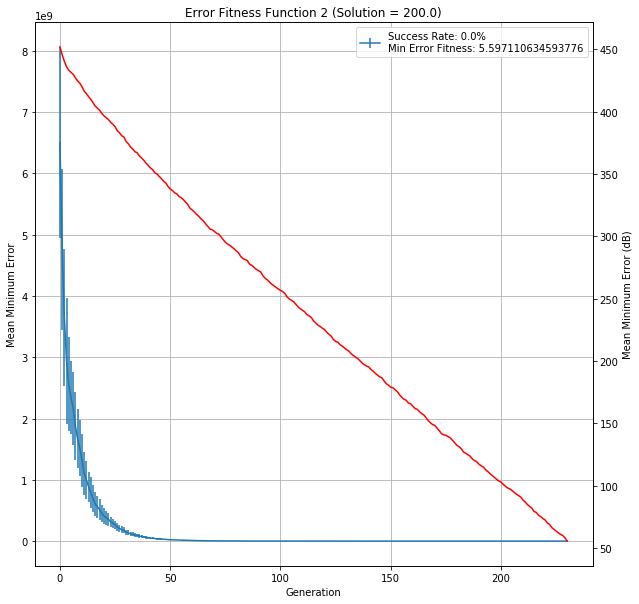

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[2_10_51_300_0.7_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,2,10,0.7,16.970668,13.719753,28.800369,13.369445,12.102197,11.194975,...,25.427224,9.231666,9.233384,17.554101,23.353077,16.58069,22.655724,16.128854,5:21:06,69900
